In [4]:
# Import the necessary modules
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

# Define the functions to be approximated
def f(x1, x2, x3):
    return x1 + x2 + x3

def g(x1, x2, x3):
    return x1**2 + x2**3 + 0.5 * x3

def h(x1, x2, x3):
    return x3 * x1**(x2)


In [2]:

# Define the range and step size for the input variables
x1_range = (0, 10)
x2_range = (0, 10)
x3_range = (0, 10)
dx = 0.5

# Generate the input data by sampling uniformly from the ranges
x1 = np.arange(*x1_range, dx)
x2 = np.arange(*x2_range, dx)
x3 = np.arange(*x3_range, dx)
X1, X2, X3 = np.meshgrid(x1, x2, x3)
X = np.stack([X1.flatten(), X2.flatten(), X3.flatten()], axis=1)

# Compute the output data by applying the functions
Y_f = f(X[:, 0], X[:, 1], X[:, 2])
Y_g = g(X[:, 0], X[:, 1], X[:, 2])
Y_h = h(X[:, 0], X[:, 1], X[:, 2])

# Convert the input and output data to torch tensors
X = torch.from_numpy(X).float()
Y_f = torch.from_numpy(Y_f).float().unsqueeze(1)
Y_g = torch.from_numpy(Y_g).float().unsqueeze(1)
Y_h = torch.from_numpy(Y_h).float().unsqueeze(1)

# Split the data into train and test sets (80% train, 20% test)
train_size = int(0.8 * len(X))
test_size = len(X) - train_size
X_train, X_test = torch.utils.data.random_split(X, [train_size, test_size])
Y_f_train, Y_f_test = torch.utils.data.random_split(Y_f, [train_size, test_size])
Y_g_train, Y_g_test = torch.utils.data.random_split(Y_g, [train_size, test_size])
Y_h_train, Y_h_test = torch.utils.data.random_split(Y_h, [train_size, test_size])


In [3]:

# Define a function to create a neural network with given hyperparameters
def create_network(input_size, hidden_size, output_size, activation):
    # Create a sequential model with one hidden layer and one output layer
    model = nn.Sequential(
        nn.Linear(input_size, hidden_size),
        activation(),
        nn.Linear(hidden_size, output_size)
    )
    # Return the model
    return model


In [5]:

# Define a function to train a neural network with given hyperparameters and data
def train_network(model, optimizer, loss_fn, batch_size, epochs,
                  X_train, Y_train, X_test=None, Y_test=None):
    # Create a data loader for the training data
    train_loader = DataLoader(
        dataset=torch.utils.data.TensorDataset(X_train, Y_train),
        batch_size=batch_size,
        shuffle=True
    )
    # Initialize a list to store the training losses
    train_losses = []
    # Initialize a list to store the test losses if test data is given
    if X_test is not None and Y_test is not None:
        test_losses = []
    # Loop over the number of epochs
    for epoch in range(epochs):
        # Initialize a variable to store the running loss for this epoch
        running_loss = 0.0
        # Loop over the batches of training data
        for inputs, targets in train_loader:
            # Zero the parameter gradients
            optimizer.zero_grad()
            # Forward pass: compute the outputs from the inputs
            outputs = model(inputs)
            # Compute the loss from the outputs and targets
            loss = loss_fn(outputs, targets)
            # Backward pass: compute the gradients from the loss
            loss.backward()
            # Update the parameters using the optimizer
            optimizer.step()
            # Accumulate the running loss
            running_loss += loss.item()
        # Compute and append the average training loss for this epoch
        train_loss = running_loss / len(train_loader)
        train_losses.append(train_loss)
        # Print the progress
        print(f"Epoch {epoch+1}, Train Loss: {train_loss:.4f}")
        # If test data is given, compute and append the test loss for this epoch
        if X_test is not None and Y_test is not None:
            # Compute the outputs from the test inputs
            outputs = model(X_test)
            # Compute the loss from the outputs and test targets
            loss = loss_fn(outputs, Y_test)
            # Append the test loss
            test_loss = loss.item()
            test_losses.append(test_loss)
            # Print the progress
            print(f"Epoch {epoch+1}, Test Loss: {test_loss:.4f}")
    # Return the train and test losses if test data is given, otherwise return only train losses
    if X_test is not None and Y_test is not None:
        return train_losses, test_losses
    else:
        return train_losses


In [6]:

# Define a function to plot the losses during training
def plot_losses(train_losses, test_losses=None):
    # Create a figure and an axis
    fig, ax = plt.subplots(figsize=(8, 6))
    # Plot the train losses
    ax.plot(train_losses, label="Train Loss")
    # If test losses are given, plot them as well
    if test_losses is not None:
        ax.plot(test_losses, label="Test Loss")
    # Set the title, labels, and legend
    ax.set_title("Losses during Training")
    ax.set_xlabel("Epoch")
    ax.set_ylabel("Loss")
    ax.legend()
    # Show and save the plot
    plt.show()
    plt.savefig("losses.png")


In [17]:

# Define a function to plot the predictions versus the true values
def plot_predictions(model, X, Y_true):
    # Create a figure and an axis
    fig, ax = plt.subplots(figsize=(8, 6))
    # Compute the predictions from the inputs
    Y_pred = model(X).detach().numpy()
    # Plot the predictions and the true values as scatter plots
    ax.scatter(Y_true, Y_pred, label="Predictions", s=2, alpha=0.3)
    ax.scatter(Y_true, Y_true, label="True Values", s=2, alpha=0.3)
    # Set the title, labels, and legend
    ax.set_title("Predictions versus True Values")
    ax.set_xlabel("True Value")
    ax.set_ylabel("Predicted Value")
    ax.legend()
    # Show and save the plot
    plt.show()
    plt.savefig("predictions.png")


Approximating function f
Epoch 1, Train Loss: 14.7435
Epoch 1, Test Loss: 0.0709
Epoch 2, Train Loss: 0.0220
Epoch 2, Test Loss: 0.0055
Epoch 3, Train Loss: 0.0045
Epoch 3, Test Loss: 0.0035
Epoch 4, Train Loss: 0.0030
Epoch 4, Test Loss: 0.0023
Epoch 5, Train Loss: 0.0021
Epoch 5, Test Loss: 0.0017
Epoch 6, Train Loss: 0.0016
Epoch 6, Test Loss: 0.0015
Epoch 7, Train Loss: 0.0014
Epoch 7, Test Loss: 0.0011
Epoch 8, Train Loss: 0.0007
Epoch 8, Test Loss: 0.0005
Epoch 9, Train Loss: 0.0005
Epoch 9, Test Loss: 0.0004
Epoch 10, Train Loss: 0.0004
Epoch 10, Test Loss: 0.0004
Epoch 11, Train Loss: 0.0004
Epoch 11, Test Loss: 0.0004
Epoch 12, Train Loss: 0.0004
Epoch 12, Test Loss: 0.0003
Epoch 13, Train Loss: 0.0004
Epoch 13, Test Loss: 0.0004
Epoch 14, Train Loss: 0.0004
Epoch 14, Test Loss: 0.0003
Epoch 15, Train Loss: 0.0003
Epoch 15, Test Loss: 0.0003
Epoch 16, Train Loss: 0.0003
Epoch 16, Test Loss: 0.0003
Epoch 17, Train Loss: 0.0002
Epoch 17, Test Loss: 0.0002
Epoch 18, Train Loss: 0

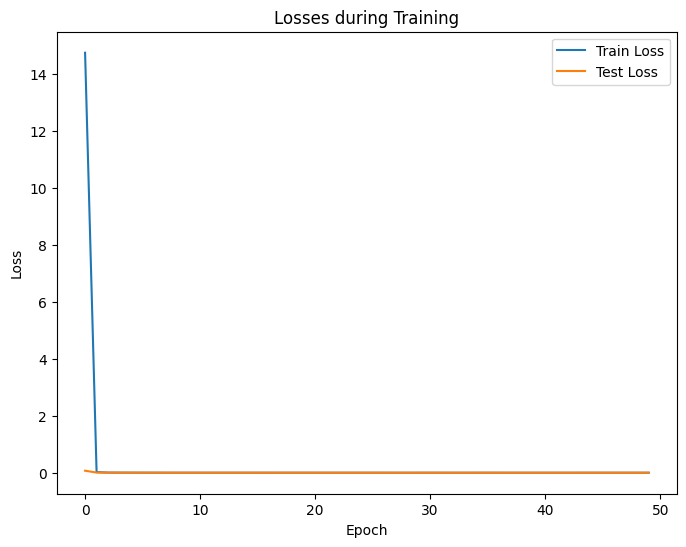

<Figure size 640x480 with 0 Axes>

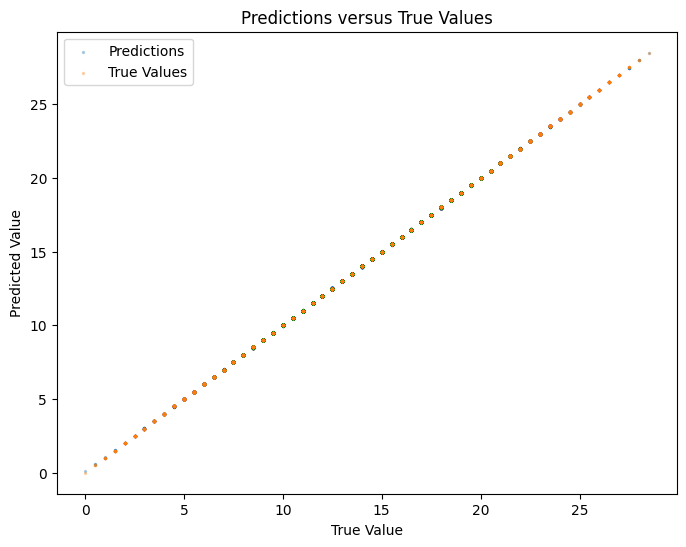

Approximating function g
Epoch 1, Train Loss: 82979.2300
Epoch 1, Test Loss: 36895.2656
Epoch 2, Train Loss: 22073.1694
Epoch 2, Test Loss: 14366.0781
Epoch 3, Train Loss: 13278.5104
Epoch 3, Test Loss: 12249.5996
Epoch 4, Train Loss: 11307.4155
Epoch 4, Test Loss: 10139.1758
Epoch 5, Train Loss: 9005.4280
Epoch 5, Test Loss: 7933.1211
Epoch 6, Train Loss: 7310.2899
Epoch 6, Test Loss: 6616.3101
Epoch 7, Train Loss: 6211.7948
Epoch 7, Test Loss: 5824.2461
Epoch 8, Train Loss: 5535.9954
Epoch 8, Test Loss: 5303.4248
Epoch 9, Train Loss: 4996.3651
Epoch 9, Test Loss: 4753.1460
Epoch 10, Train Loss: 4460.9778
Epoch 10, Test Loss: 4119.2852
Epoch 11, Train Loss: 3886.1192
Epoch 11, Test Loss: 3568.3005
Epoch 12, Train Loss: 3308.9759
Epoch 12, Test Loss: 3096.0237
Epoch 13, Train Loss: 2729.8554
Epoch 13, Test Loss: 2431.4866
Epoch 14, Train Loss: 2217.3048
Epoch 14, Test Loss: 1982.7952
Epoch 15, Train Loss: 1827.8025
Epoch 15, Test Loss: 1707.8236
Epoch 16, Train Loss: 1473.2610
Epoch 16

<Figure size 640x480 with 0 Axes>

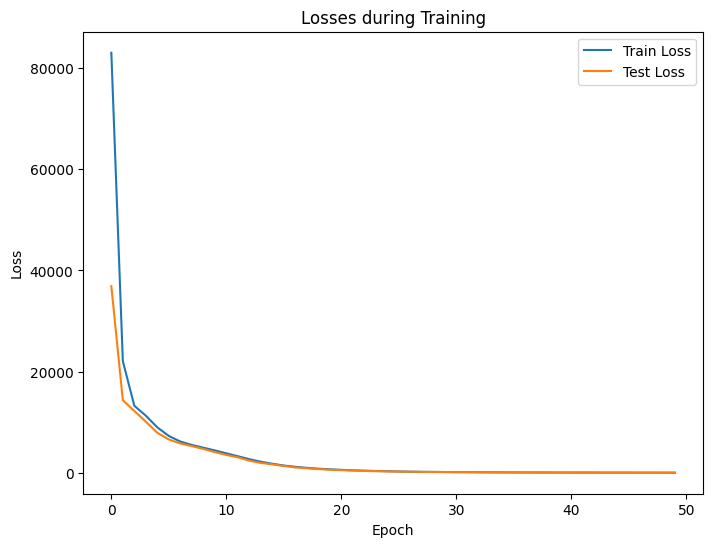

<Figure size 640x480 with 0 Axes>

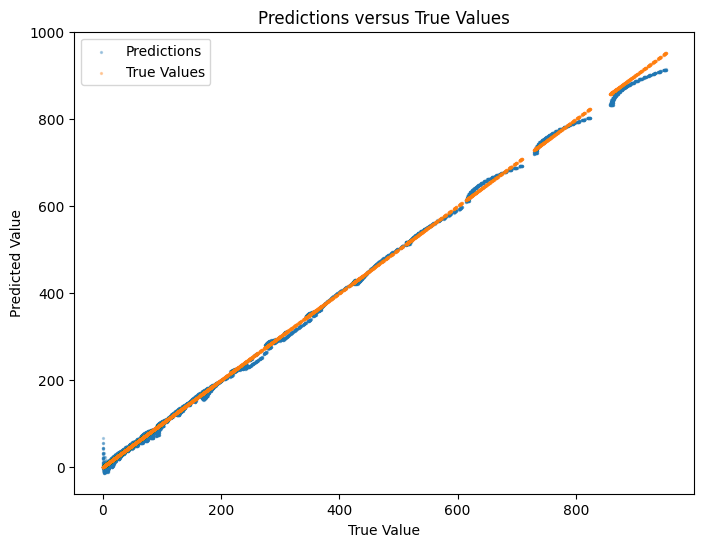

Approximating function h
Epoch 1, Train Loss: 500558573103277440.0000
Epoch 1, Test Loss: 500558509700546560.0000
Epoch 2, Train Loss: 500558338739482368.0000
Epoch 2, Test Loss: 500558131743424512.0000
Epoch 3, Train Loss: 500557835125106176.0000
Epoch 3, Test Loss: 500557513268133888.0000
Epoch 4, Train Loss: 500557092147932672.0000
Epoch 4, Test Loss: 500556585555197952.0000
Epoch 5, Train Loss: 500556020750959488.0000
Epoch 5, Test Loss: 500555382964355072.0000
Epoch 6, Train Loss: 500554726180539840.0000
Epoch 6, Test Loss: 500553905495605248.0000
Epoch 7, Train Loss: 500553156983703744.0000
Epoch 7, Test Loss: 500552359307378688.0000
Epoch 8, Train Loss: 500551432585170880.0000
Epoch 8, Test Loss: 500550435162030080.0000
Epoch 9, Train Loss: 500549417193678336.0000
Epoch 9, Test Loss: 500548373577728000.0000
Epoch 10, Train Loss: 500547138938527040.0000
Epoch 10, Test Loss: 500545934036303872.0000
Epoch 11, Train Loss: 500544618192693120.0000
Epoch 11, Test Loss: 5005433570559262

<Figure size 640x480 with 0 Axes>

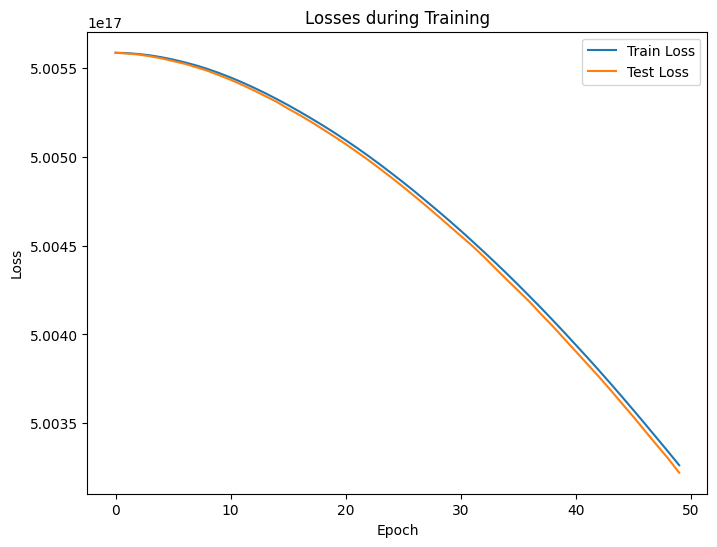

<Figure size 640x480 with 0 Axes>

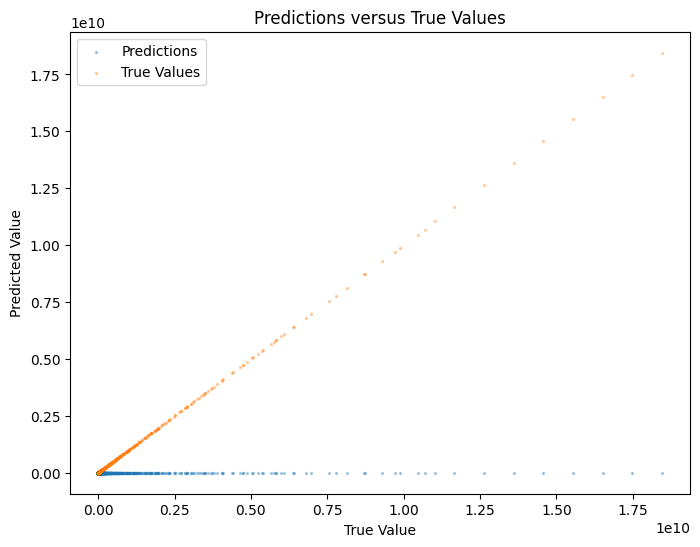

<Figure size 640x480 with 0 Axes>

In [18]:

# Define a list of functions to be approximated
functions = [f, g, h]
# Define a list of function names for printing and plotting purposes
function_names = ["f", "g", "h"]
# Define a list of output tensors for each function
outputs = [Y_f, Y_g, Y_h]
# Define a list of output tensors for each function for train and test sets
outputs_train = [Y_f_train, Y_g_train, Y_h_train]
outputs_test = [Y_f_test, Y_g_test, Y_h_test]

# Loop over each function to be approximated
for i in range(len(functions)):
    # Print the function name
    print(f"Approximating function {function_names[i]}")
    # Create a neural network with given hyperparameters
    input_size = 3 # The number of input variables (x1, x2, x3)
    hidden_size = 32 # The number of units in the hidden layer
    output_size = 1 # The number of output variables (y)
    activation = nn.ReLU # The activation function for the hidden layer
    model = create_network(input_size, hidden_size,
                           output_size, activation)
    # Create an optimizer with given hyperparameters
    optimizer = optim.Adam(model.parameters(), lr=0.01)
    # Create a loss function with given hyperparameters
    loss_fn = nn.MSELoss()
    # Train the network with given hyperparameters and data
    batch_size = 64 # The number of samples in each batch
    epochs = 50 # The number of times to loop over the whole dataset
    train_losses, test_losses = train_network(model, optimizer, loss_fn,
                                              batch_size, epochs,
                                              X_train.dataset, outputs_train[i].dataset,
                                              X_test.dataset, outputs_test[i].dataset)

    # Plot the losses during training
    plot_losses(train_losses, test_losses)
    # Plot the predictions versus the true values
    plot_predictions(model, X, outputs[i])
    # Save the model
    torch.save(model, f"model_{function_names[i]}.pt")